<a href="https://colab.research.google.com/github/Juanisazalu/Analitica2_trabajo2/blob/main/Interpretaci%C3%B3n_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from kneed import KneeLocator
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FactorAnalysis
from scipy import stats
import plotly.express as px

In [49]:
df=pd.read_csv("tablacompleta.csv")

En el conjunto de datos proporcionado, cada variable representa diferentes aspectos del comportamiento de los titulares de tarjetas de crédito. A continuación, te proporciono una interpretación de cada una de las variables:

CUST_ID (Identificación de Titular de Tarjeta de Crédito): Esta variable es una identificación única o código para cada titular de una tarjeta de crédito. Es una variable categórica que se utiliza para distinguir a los titulares de tarjetas de crédito en el conjunto de datos.

BALANCE (Saldo): Esta variable indica la cantidad de dinero que un titular de tarjeta de crédito tiene disponible en su cuenta para realizar compras. Es una medida del saldo actual en la cuenta del titular.

BALANCE_FREQUENCY (Frecuencia de Actualización de Saldo): Representa la frecuencia con la que el saldo de la cuenta se actualiza, con un puntaje que varía entre 0 y 1. Un puntaje de 1 significa que el saldo se actualiza con frecuencia, mientras que un puntaje de 0 indica que el saldo no se actualiza con frecuencia.

PURCHASES (Compras): Indica el monto total de las compras realizadas desde la cuenta de la tarjeta de crédito durante un período de tiempo.

ONEOFF_PURCHASES (Compras en un Solo Pago): Representa el monto máximo gastado en una sola compra.

INSTALLMENTS_PURCHASES (Compras en Cuotas): Indica la cantidad de compras realizadas en cuotas o a plazos.

CASH_ADVANCE (Avance de Efectivo): Muestra la cantidad de dinero en efectivo solicitada o retirada por el titular de la tarjeta de crédito.

PURCHASES_FREQUENCY (Frecuencia de Compras): Representa la frecuencia con la que se realizan compras, con un puntaje entre 0 y 1. Un puntaje de 1 indica que las compras se realizan con frecuencia.

ONEOFFPURCHASESFREQUENCY (Frecuencia de Compras en un Solo Pago): Indica con qué frecuencia se realizan compras en un solo pago.

PURCHASESINSTALLMENTSFREQUENCY (Frecuencia de Compras a Plazos): Muestra la frecuencia de las compras a plazos.

CASHADVANCEFREQUENCY (Frecuencia de Avances de Efectivo): Indica la frecuencia con la que se realizan avances de efectivo.

CASHADVANCETRX (Número de Transacciones de Avance de Efectivo): Representa el número de transacciones realizadas con avances de efectivo.

PURCHASES_TRX (Número de Transacciones de Compras): Indica el número de transacciones de compra realizadas.

CREDIT_LIMIT (Límite de Crédito): Representa el límite de crédito otorgado al titular de la tarjeta de crédito.

PAYMENTS (Pagos): Muestra la cantidad total de pagos realizados por el titular de la tarjeta de crédito.

MINIMUM_PAYMENTS (Pagos Mínimos): Indica la cantidad mínima de pagos que el titular de la tarjeta de crédito está obligado a realizar.

PRCFULLPAYMENT (Porcentaje de Pago Total): Representa el porcentaje del pago total realizado por el titular de la tarjeta de crédito.

TENURE (Duración de la Tenencia): Indica la duración o antigüedad del servicio de la tarjeta de crédito para el titular de la tarjeta.

Estas variables proporcionan información sobre el comportamiento financiero y el uso de la tarjeta de crédito por parte de los titulares, lo que puede ser útil para segmentar a los clientes y desarrollar estrategias de marketing dirigidas a grupos específicos.

las variables que mas carga tienen en la componente uno son:
frecuencia compras
frecuencia compras a plazo
frecuencia avances en efectivo
Porcentaje total  pagado por el titular

en la componente dos son:
frecuencua actualizacion saldo
Saldo disponible
Limite de la tarjeta de credito
frecuencia avances en efectivo
frecuencias compras de un solo pago
Porcentaje total  pagado por el titular

en la componente tres:
Antieguedad
frecuencia avances en efectivo
frecuencia compras a plazo
frecuencia compras con la tarjera




<Axes: xlabel='cluster_3', ylabel='count'>

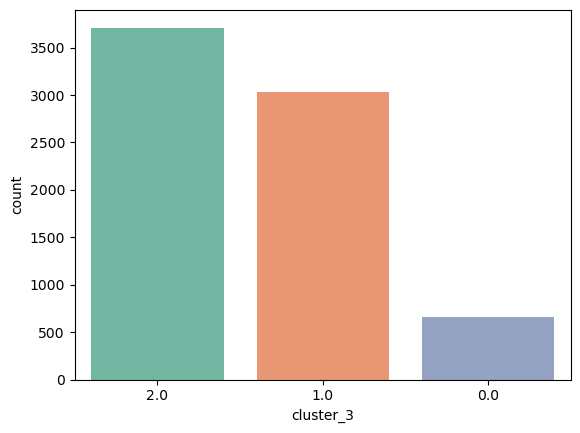

In [9]:
sns.countplot(x="cluster_3",data=df, palette="Set2", order = df['cluster_3'].value_counts().index)


Los cluster tienen observaciones diferentes, el cluster dos es el que mayor tiene observaciones, luego el uno y por ultimo el cluster cero.

In [10]:
df.groupby(["cluster_3"]).mean()

,saldo,frecuenciaactsaldo,comprastotales,montomaxcomprado,montoacuotas,anticipoefectivo,frecuenciacompras,freccomprasunavez,freccomprasplazo,frecpagoantefectivo,ntranscashinadv,ntransacciones,limtarjetacredito,pagos,montominpagos,%totalpagado,antiguedad
cluster_3,,,,,,,,,,,,,,,,,
0.0,812.412994,0.780677,362.481763,199.297325,163.640365,1059.872535,0.420274,0.107561,0.291257,0.191235,3.139818,5.183891,2351.516387,571.743336,348.348157,0.171458,7.404255
1.0,918.028762,0.933743,1121.533419,564.019310,557.710310,251.794257,0.861912,0.309196,0.682385,0.046449,0.906601,20.971947,4423.476431,1255.861555,448.827536,0.269429,11.882508
2.0,1548.508540,0.854743,245.257370,188.439569,57.101873,953.249491,0.158117,0.082722,0.073503,0.158657,3.222582,2.825653,3828.021198,1076.785033,588.057524,0.053901,11.873080


# Boxplot


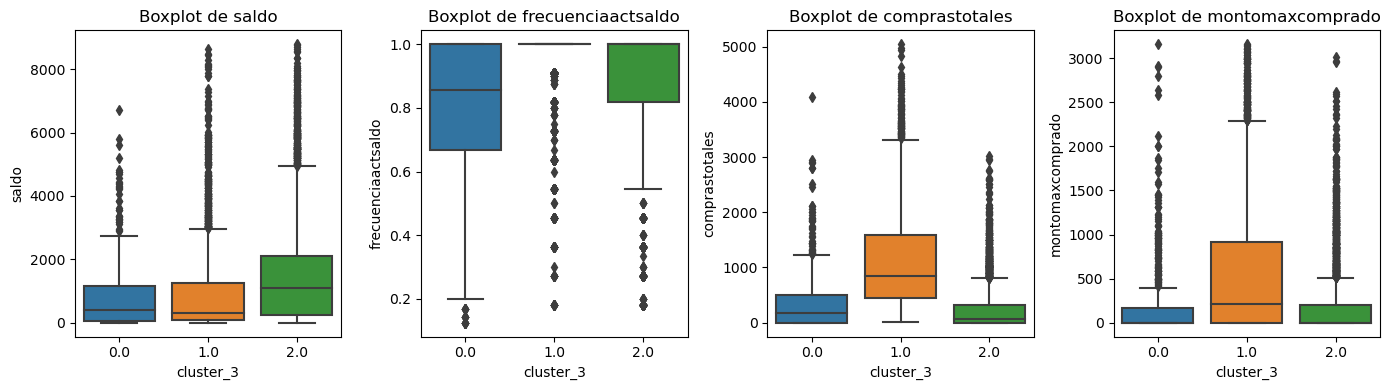

In [65]:
fig, axes = plt.subplots(1, 4, figsize=(14, 4))

# Primer boxplot
sns.boxplot(x="cluster_3", y="saldo", data=df, ax=axes[0])
axes[0].set_title("Boxplot de saldo")
axes[0].set_xlabel("cluster_3")
axes[0].set_ylabel("saldo")

# Segundo boxplot
sns.boxplot(x="cluster_3", y="frecuenciaactsaldo", data=df, ax=axes[1])
axes[1].set_title("Boxplot de frecuenciaactsaldo")
axes[1].set_xlabel("cluster_3")
axes[1].set_ylabel("frecuenciaactsaldo")

# Segundo boxplot
sns.boxplot(x="cluster_3", y="comprastotales", data=df, ax=axes[2])
axes[2].set_title("Boxplot de comprastotales")
axes[2].set_xlabel("cluster_3")
axes[2].set_ylabel("comprastotales")

# Segundo boxplot
sns.boxplot(x="cluster_3", y="montomaxcomprado", data=df, ax=axes[3])
axes[3].set_title("Boxplot de montomaxcomprado")
axes[3].set_xlabel("cluster_3")
axes[3].set_ylabel("montomaxcomprado")
# Ajustar el diseño
plt.tight_layout()

# Mostrar la figura con ambos subgráficos
plt.show()

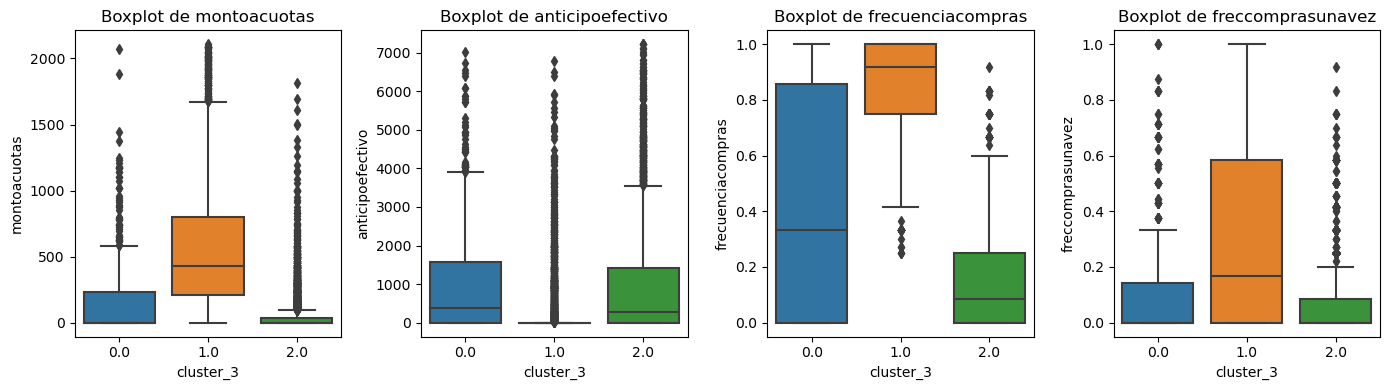

In [68]:
fig, axes = plt.subplots(1, 4, figsize=(14, 4))

# Primer boxplot
sns.boxplot(x="cluster_3", y="montoacuotas", data=df, ax=axes[0])
axes[0].set_title("Boxplot de montoacuotas")
axes[0].set_xlabel("cluster_3")
axes[0].set_ylabel("montoacuotas")

# Segundo boxplot
sns.boxplot(x="cluster_3", y="anticipoefectivo", data=df, ax=axes[1])
axes[1].set_title("Boxplot de anticipoefectivo")
axes[1].set_xlabel("cluster_3")
axes[1].set_ylabel("anticipoefectivo")

# Segundo boxplot
sns.boxplot(x="cluster_3", y="frecuenciacompras", data=df, ax=axes[2])
axes[2].set_title("Boxplot de frecuenciacompras")
axes[2].set_xlabel("cluster_3")
axes[2].set_ylabel("frecuenciacompras")

# Segundo boxplot
sns.boxplot(x="cluster_3", y="freccomprasunavez", data=df, ax=axes[3])
axes[3].set_title("Boxplot de freccomprasunavez")
axes[3].set_xlabel("cluster_3")
axes[3].set_ylabel("freccomprasunavez")
# Ajustar el diseño
plt.tight_layout()

# Mostrar la figura con ambos subgráficos
plt.show()

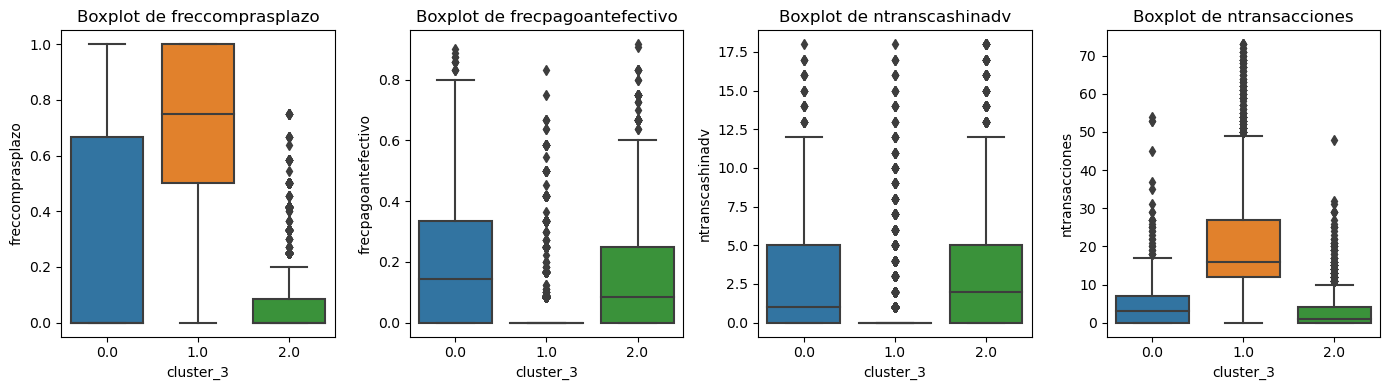

In [70]:
fig, axes = plt.subplots(1, 4, figsize=(14, 4))

# Primer boxplot
sns.boxplot(x="cluster_3", y="freccomprasplazo", data=df, ax=axes[0])
axes[0].set_title("Boxplot de freccomprasplazo")
axes[0].set_xlabel("cluster_3")
axes[0].set_ylabel("freccomprasplazo")

# Segundo boxplot
sns.boxplot(x="cluster_3", y="frecpagoantefectivo", data=df, ax=axes[1])
axes[1].set_title("Boxplot de frecpagoantefectivo")
axes[1].set_xlabel("cluster_3")
axes[1].set_ylabel("frecpagoantefectivo")

# Segundo boxplot
sns.boxplot(x="cluster_3", y="ntranscashinadv", data=df, ax=axes[2])
axes[2].set_title("Boxplot de ntranscashinadv")
axes[2].set_xlabel("cluster_3")
axes[2].set_ylabel("ntranscashinadv")

# Segundo boxplot
sns.boxplot(x="cluster_3", y="ntransacciones", data=df, ax=axes[3])
axes[3].set_title("Boxplot de ntransacciones")
axes[3].set_xlabel("cluster_3")
axes[3].set_ylabel("ntransacciones")
# Ajustar el diseño
plt.tight_layout()

# Mostrar la figura con ambos subgráficos
plt.show()

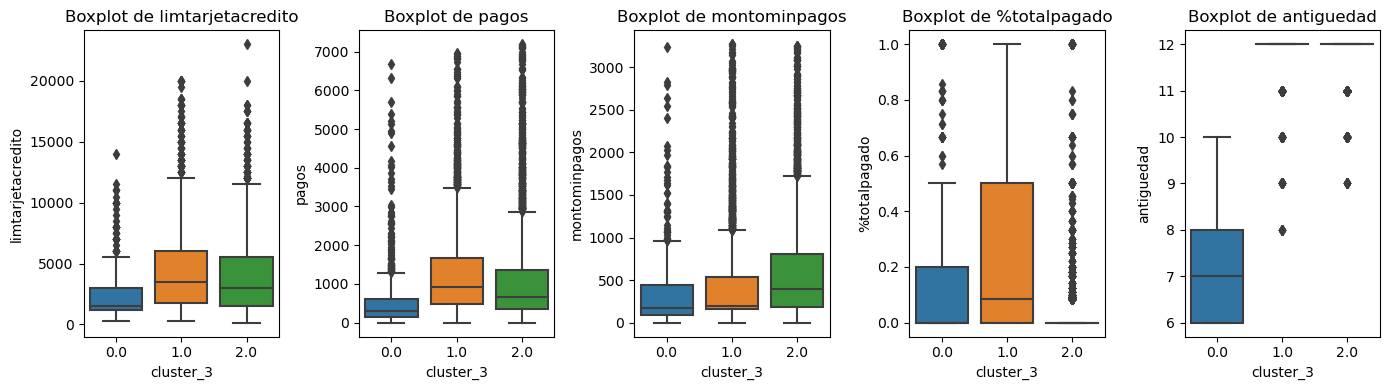

In [75]:
fig, axes = plt.subplots(1, 5, figsize=(14, 4))

# Primer boxplot
sns.boxplot(x="cluster_3", y="limtarjetacredito", data=df, ax=axes[0])
axes[0].set_title("Boxplot de limtarjetacredito")
axes[0].set_xlabel("cluster_3")
axes[0].set_ylabel("limtarjetacredito")

# Segundo boxplot
sns.boxplot(x="cluster_3", y="pagos", data=df, ax=axes[1])
axes[1].set_title("Boxplot de pagos")
axes[1].set_xlabel("cluster_3")
axes[1].set_ylabel("pagos")

# Segundo boxplot
sns.boxplot(x="cluster_3", y="montominpagos", data=df, ax=axes[2])
axes[2].set_title("Boxplot de montominpagos")
axes[2].set_xlabel("cluster_3")
axes[2].set_ylabel("montominpagos")

# Segundo boxplot
sns.boxplot(x="cluster_3", y="%totalpagado", data=df, ax=axes[3])
axes[3].set_title("Boxplot de %totalpagado")
axes[3].set_xlabel("cluster_3")
axes[3].set_ylabel("%totalpagado")

# Segundo boxplot
sns.boxplot(x="cluster_3", y="antiguedad", data=df, ax=axes[4])
axes[4].set_title("Boxplot de antiguedad")
axes[4].set_xlabel("cluster_3")
axes[4].set_ylabel("antiguedad")
# Ajustar el diseño
plt.tight_layout()

# Mostrar la figura con ambos subgráficos
plt.show()

Medias de las varibles por ca cluster